# Content-Based Recommendation System with MovieLens Dataset

This notebook demonstrates how to build a content-based movie recommendation system using the MovieLens dataset. We will walk through data loading, preprocessing, feature extraction, similarity computation, and generating recommendations.

In [31]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Explore the MovieLens Dataset

We will load the MovieLens dataset (movies.csv and ratings.csv) and perform basic exploration.

In [32]:
# Load MovieLens dataset (update the path if needed)
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')

# Display first few rows of movies and ratings
display(movies.head())
display(ratings.head())

# Check for missing values
print('Missing values in movies:')
print(movies.isnull().sum())
print('\nMissing values in ratings:')
print(ratings.isnull().sum())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Missing values in movies:
movieId    0
title      0
genres     0
dtype: int64

Missing values in ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


## Preprocess Movie Data

Clean and preprocess the movie data, including handling missing values and formatting genres.

In [33]:
# Preprocess movie data
# Fill missing genres with empty string
movies['genres'] = movies['genres'].fillna('')

# Replace '|' with space for easier text processing
def clean_genres(genres):
    return genres.replace('|', ' ')

movies['clean_genres'] = movies['genres'].apply(clean_genres)

# Display processed movies
display(movies[['title', 'genres', 'clean_genres']].head())

,title,genres,clean_genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy,Adventure Children Fantasy
2,Grumpier Old Men (1995),Comedy|Romance,Comedy Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance,Comedy Drama Romance
4,Father of the Bride Part II (1995),Comedy,Comedy


## Extract Movie Features (Genres)

We will use TF-IDF vectorization to transform the genres into feature vectors for each movie.

In [34]:
# Extract features from genres using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(movies['clean_genres'])

print('TF-IDF matrix shape:', tfidf_matrix.shape)

TF-IDF matrix shape: (9742, 24)


## Compute Movie Similarity Matrix

We will compute the similarity between movies using cosine similarity based on the extracted genre features.

In [35]:
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

print('Cosine similarity matrix shape:', cosine_sim.shape)

Cosine similarity matrix shape: (9742, 9742)


## Build Content-Based Recommendation Function

We will implement a function that recommends movies similar to a given movie using the similarity matrix.

In [36]:
# Function to recommend movies based on content similarity
def recommend_movies(title, movies_df, cosine_sim_matrix, top_n=10):
    # Get the index of the movie that matches the title
    idx = movies_df[movies_df['title'].str.lower() == title.lower()].index
    if len(idx) == 0:
        print(f"Movie '{title}' not found.")
        return []
    idx = idx[0]
    # Get pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    # Sort movies by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the top_n most similar movies (excluding itself)
    sim_scores = sim_scores[1:top_n+1]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top_n most similar movies
    return movies_df.iloc[movie_indices][['title', 'genres']]

## Generate Recommendations for a Sample Movie

Let's generate and display recommendations for a sample movie.

In [37]:
# Generate recommendations for a sample movie
target_movie = 'Toy Story (1995)'
print(f"Recommendations for '{target_movie}':")
recommendations = recommend_movies(target_movie, movies, cosine_sim, top_n=10)
display(recommendations)

Recommendations for 'Toy Story (1995)':


,title,genres
1706,Antz (1998),Adventure|Animation|Children|Comedy|Fantasy
2355,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
2809,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure|Animation|Children|Comedy|Fantasy
3000,"Emperor's New Groove, The (2000)",Adventure|Animation|Children|Comedy|Fantasy
3568,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy
6194,"Wild, The (2006)",Adventure|Animation|Children|Comedy|Fantasy
6486,Shrek the Third (2007),Adventure|Animation|Children|Comedy|Fantasy
6948,"Tale of Despereaux, The (2008)",Adventure|Animation|Children|Comedy|Fantasy
7760,Asterix and the Vikings (Astérix et les Viking...,Adventure|Animation|Children|Comedy|Fantasy
8219,Turbo (2013),Adventure|Animation|Children|Comedy|Fantasy


## Evaluate Recommendation Results

Let's discuss and visualize the results. Optionally, we can compare recommendations with user ratings or preferences.

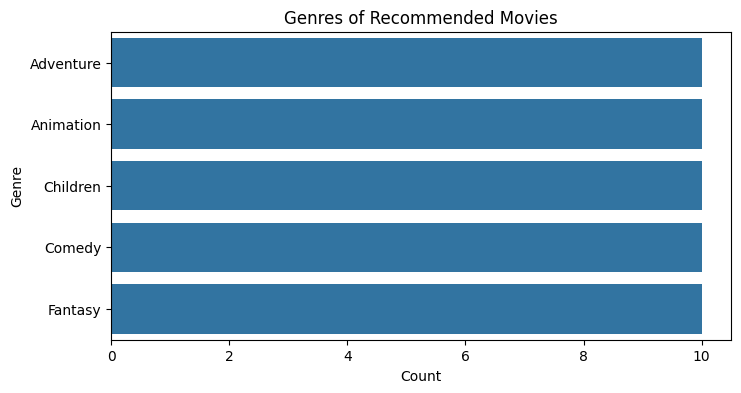

The recommended movies are selected based on genre similarity to the target movie. You can further improve the system by incorporating additional features such as tags, plot summaries, or user ratings.


In [38]:
# Visualize genres of recommended movies
if not recommendations.empty:
    plt.figure(figsize=(8,4))
    genres = recommendations['genres'].str.split('|').explode()
    sns.countplot(y=genres, order=genres.value_counts().index)
    plt.title('Genres of Recommended Movies')
    plt.xlabel('Count')
    plt.ylabel('Genre')
    plt.show()
else:
    print('No recommendations to visualize.')

# Discussion:
print("The recommended movies are selected based on genre similarity to the target movie. You can further improve the system by incorporating additional features such as tags, plot summaries, or user ratings.")

## Evaluation Metrics for Content-Based Recommendation Systems

Here are common metrics to evaluate recommendation systems and how they apply to content-based filtering:

- **RMSE (Root Mean Squared Error):**
  - Measures the difference between predicted and actual ratings (if the system predicts ratings).
  - Lower RMSE means better prediction accuracy.

- **Precision:**
  - Fraction of recommended items that are relevant (e.g., user actually liked them).
  - High precision means most recommendations are useful.

- **Recall:**
  - Fraction of relevant items that are recommended out of all relevant items available.
  - High recall means the system finds most of the items a user would like.

- **Coverage:**
  - Proportion of items that can be recommended by the system.
  - High coverage means the system can recommend a wide variety of items.

- **Diversity:**
  - Measures how different the recommended items are from each other.
  - High diversity means recommendations are not too similar, exposing users to a broader range of items.

- **Serendipity:**
  - Measures how surprising and unexpectedly interesting the recommendations are to the user.
  - High serendipity means the system suggests items the user might not have found on their own, but still likes.

In content-based filtering, precision, recall, coverage, and diversity are often computed by comparing the recommended movies to the user's actual preferences or held-out ratings. RMSE is used if the system predicts explicit ratings. Serendipity is more subjective and can be estimated by checking if recommendations are both relevant and novel to the user.

In [39]:
# Example: Compute Precision, Recall, and Coverage for Recommendations
# (Assume you have a test set of user-movie pairs and their true relevance)
def evaluate_recommendations(recommend_func, test_users, test_ratings, movies_df, cosine_sim, top_n=10):
    precision_list = []
    recall_list = []
    recommended_items = set()
    relevant_items = set()
    for user, true_movies in test_users.items():
        # Get recommendations for this user (simulate by picking a favorite movie)
        if not true_movies:
            continue
        recs = recommend_func(true_movies[0], movies_df, cosine_sim, top_n=top_n)
        rec_titles = set(recs['title'])
        true_titles = set([movies_df.loc[movies_df['movieId'] == m, 'title'].values[0] for m in true_movies if m in movies_df['movieId'].values])
        recommended_items.update(rec_titles)
        relevant_items.update(true_titles)
        # Precision: relevant & recommended / recommended
        if rec_titles:
            precision = len(rec_titles & true_titles) / len(rec_titles)
            precision_list.append(precision)
        # Recall: relevant & recommended / relevant
        if true_titles:
            recall = len(rec_titles & true_titles) / len(true_titles)
            recall_list.append(recall)
    # Coverage: recommended items / all items
    coverage = len(recommended_items) / len(movies_df)
    avg_precision = np.mean(precision_list) if precision_list else 0
    avg_recall = np.mean(recall_list) if recall_list else 0
    print(f'Precision: {avg_precision:.2f}')
    print(f'Recall: {avg_recall:.2f}')
    print(f'Coverage: {coverage:.2f}')

# Note: You need to prepare test_users (dict of userId: [list of relevant movieIds]) and test_ratings for a real evaluation.